# 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *

In [2]:
# changing the max_columns value
pd.set_option("display.max_columns", None)

# set seaborn theme
sns.set_theme()
sns.set(font_scale=0.8)

# 2. Functions

In [3]:

def EDAplot(data=None, x=None, y=None):
    cor = round(df[y].corr(df[x]),3)
    
    fig = plt.figure(figsize=(8,2))
    fig.suptitle(f'{x} (corr: {cor})')
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    sns.histplot(data=data, x=x, kde=True, ax=ax1)
    sns.regplot(data=data, x=x, y=y, ax=ax2)
    
    return(plt.show())


def Model(model):
    
    # Build pipeline
    Input = [('scale',StandardScaler()), ('model',model)]
    pipe = Pipeline(Input)
    
    # Fit
    pipe.fit(x_train, y_train)
    
    # Metrics
    yhat_test = pipe.predict(x_test)
    score = r2_score(y_test, yhat_test)
    rmse = mean_squared_error(y_test, yhat_test, squared=False)
    df_fit.loc[len(df_fit)] = [f'{model}', score, rmse]
    
    # Plots
    fig, ax = plt.subplots(1, 3,  figsize=(12,2))
    fig.suptitle(f'{model}, R-squared: {round(score,3)}, RMSE:{round(rmse,3)}')
    # Distribution plot, Test vs Predicted
    sns.kdeplot(y_test, label='Actual Value', ax=ax[0])
    sns.kdeplot(yhat_test, label='Predicted Value', ax=ax[0])
    ax[0].legend(loc="upper right")
    # Scatter plot, Test vs Predicted
    sns.scatterplot(x=yhat_test, y=y_test, ax=ax[1])
    sns.lineplot(x=yhat_test, y=yhat_test, color='tab:orange', ax=ax[1])
    ax[1].set_xlabel('Predicted mpg')
    ax[1].set_ylabel('Actual mpg')
    # Residual plot
    sns.scatterplot(x=yhat_test, y=y_test-yhat_test, ax=ax[2])
    ax[2].axhline(y=0, color='tab:orange')
    ax[2].set_xlabel('Predicted mpg')
    ax[2].set_ylabel('Residuals')
    
    return(plt.show())

# 3. Data
**Auto-mpg dataset** - Mileage per gallon performances of various cars.

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. This dataset and the original dataset is available in Kaggle https://www.kaggle.com/datasets/uciml/autompg-dataset

In [4]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [17]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Web searches to find some missing data;

| Model          | horsepower |
|:--------------:|:----------:|
| ford pinto 71' | 75         |
| ford maverick 74' | 82      |
| renault lecar deluxe 80' | 50  |
| ford mustang cobra 80' | 88 |
| renault 18i 81' | 82 |
| amc concord dl 82' | 82 |

Add the hoesepower to the table

In [8]:
df.loc[32,'horsepower'] = 75
df.loc[126,'horsepower'] = 82
df.loc[330,'horsepower'] = 50
df.loc[336,'horsepower'] = 88
df.loc[354,'horsepower'] = 82
df.loc[374,'horsepower'] = 82
df['horsepower'] = df['horsepower'].astype(int)

In [9]:
df.describe().style.format(precision=0)  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398,398,398,398,398,398,398,398
mean,24,5,193,104,2970,16,76,2
std,8,2,104,38,847,3,4,1
min,9,3,68,46,1613,8,70,1
25%,18,4,104,75,2224,14,73,1
50%,23,4,148,92,2804,16,76,1
75%,29,8,262,125,3608,17,79,2
max,47,8,455,230,5140,25,82,3


# 4. Exploratory Analysis

<AxesSubplot:>

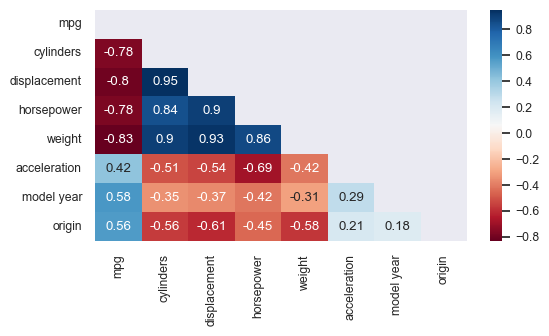

In [10]:
#correlation
plt.figure(figsize=(6,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),annot=True, mask=mask, cmap='RdBu')

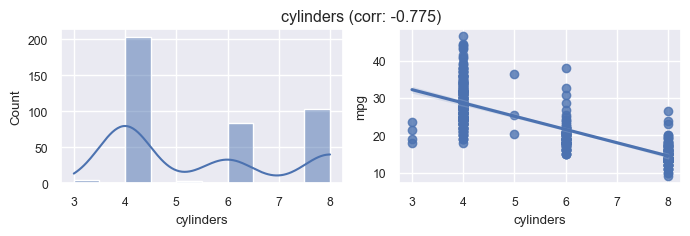

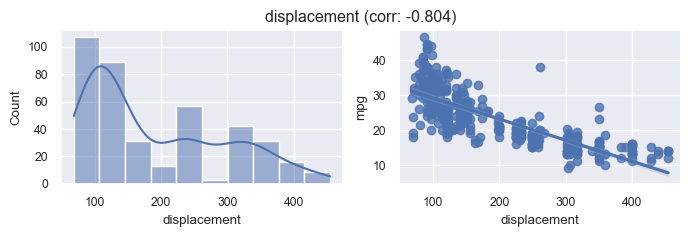

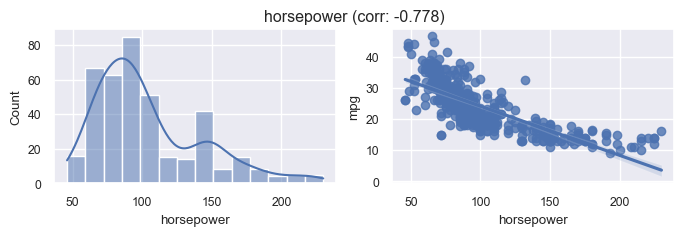

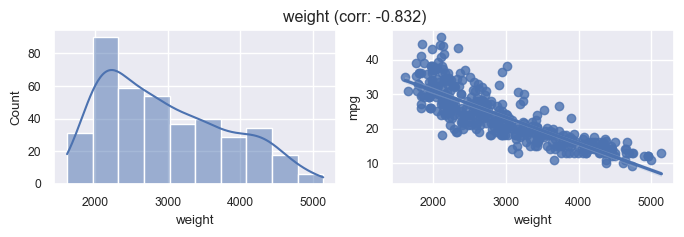

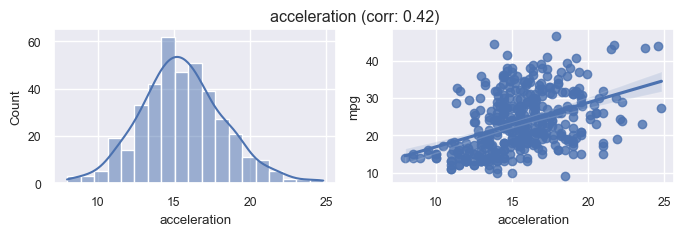

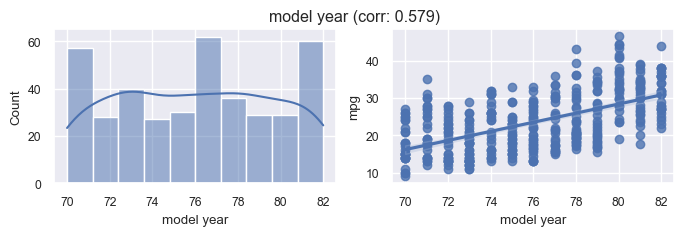

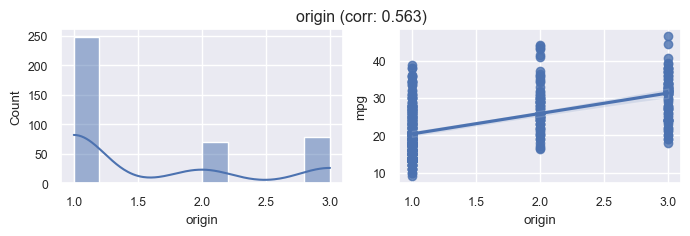

In [11]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
for x in features:
    EDAplot(data=df, x=x, y='mpg')

### Summary
* Numerical variables - `cylinders`,`displacement`,`horsepower`,`weight`,`acceleration`,and `model year`
* Categorical variables - `origin`

# 5. Model

In [81]:
# fit result table
df_fit = pd.DataFrame(columns=['Model','R-squared','RMSE'])

## 5.A. LinearRegression
Build `LinearRegression` model from numerical variables - `cylinders`,`displacement`,`horsepower`,`weight`,`acceleration`,and `model year`

In [34]:
features = ['cylinders','displacement','horsepower', 'weight','acceleration', 'model year']
x = df[features]
y = df['mpg']

### 5.A.1. Split train and test set

In [35]:
#  spilt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 5.A.2. Model and Fit

In [82]:
# Build pipeline
model = LinearRegression()
Input = [('scale',StandardScaler()), ('model',model)]
pipe = Pipeline(Input)
    
# Fit
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [84]:
# Metrics
yhat_test = pipe.predict(x_test)
score = r2_score(y_test, yhat_test)
rmse = mean_squared_error(y_test, yhat_test, squared=False)
df_fit.loc[len(df_fit)] = [f'{model}', score, rmse]

In [88]:
df_fit

,Model,R-squared,RMSE
0,LinearRegression(),0.824335,3.07325


# Compare Linear Model
Build linear model with six numerical variables.

In [12]:
features = ['cylinders','displacement','horsepower', 'weight','acceleration', 'model year']
x = df[features]
y = df['mpg']

### Split train and test set

In [13]:
#  spilt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model and Fit

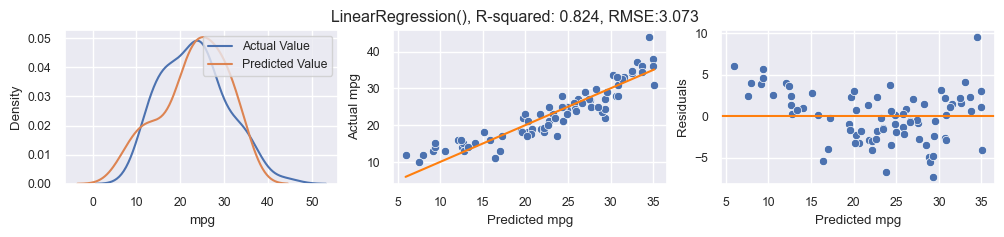

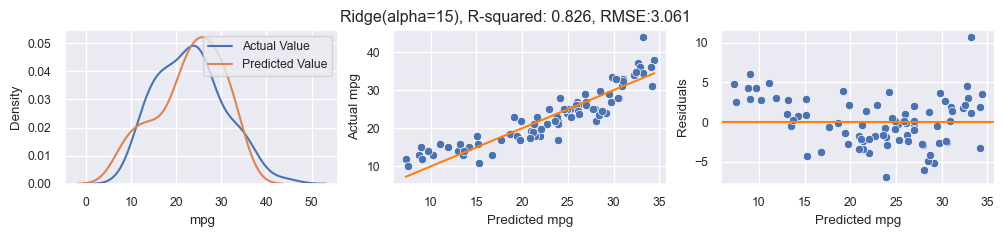

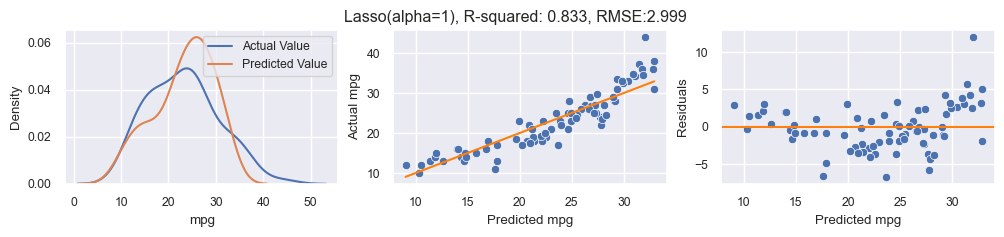

,Model,R-squared,RMSE
0,LinearRegression(),0.824335,3.073250
1,Ridge(alpha=15),0.825787,3.060523
2,Lasso(alpha=1),0.832739,2.998836


In [14]:
df_fit = pd.DataFrame(columns=['Model','R-squared','RMSE'])
models = [LinearRegression(), Ridge(15), Lasso(1)]

for model in models:
    Model(model)
    
df_fit

In [17]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__scale', 'estimator__model', 'estimator__scale__copy', 'estimator__scale__with_mean', 'estimator__scale__with_std', 'estimator__model__alpha', 'estimator__model__copy_X', 'estimator__model__fit_intercept', 'estimator__model__max_iter', 'estimator__model__normalize', 'estimator__model__positive', 'estimator__model__random_state', 'estimator__model__solver', 'estimator__model__tol', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [16]:
model = Ridge()
Input = [('scale',StandardScaler()), ('model', model)]
pipe = Pipeline(Input)
parameters = [{'model__alpha':[0,0.1,1,10,20,50,60,70,80, 90,100,110,120,130,140,150,160,170,180, 1000]}]
grid = GridSearchCV(pipe, parameters, scoring='r2')
grid.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid=[{'model__alpha': [0, 0.1, 1, 10, 20, 50, 60, 70, 80,
                                           90, 100, 110, 120, 130, 140, 150,
                                           160, 170, 180, 1000]}],
             scoring='r2')

In [18]:
grid.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge(alpha=1))])

In [19]:
grid.best_score_

0.7928298359066712

In [20]:
grid.scorer_

make_scorer(r2_score)

In [22]:
yhat_test = grid.predict(x_test)
score = r2_score(y_test, yhat_test)
rmse = mean_squared_error(y_test, yhat_test, squared=False)

In [23]:
score

0.8246636755109868

In [24]:
results = pd.DataFrame(columns=['alpha', 'R2_train', 'R2_test'])

for alpha in [0,0.1,1,10,20,50,60,70,80, 90,100,110,120,130,140,150,160,170,180, 1000]:
    model = Ridge(alpha)
    Input = [('scale',StandardScaler()), ('model', model)]
    pipe = Pipeline(Input)
    pipe.fit(x_train, y_train)
    # train R2
    R2_train = pipe.score(x_train, y_train)
    # test R2
    yhat_test = pipe.predict(x_test)
    R2_test = r2_score(y_test, yhat_test)
    results.loc[len(results)] = [alpha, R2_train, R2_test]

In [25]:
results

,alpha,R2_train,R2_test
0,0.0,0.803881,0.824335
1,0.1,0.803881,0.824372
2,1.0,0.803823,0.824664
3,10.0,0.800996,0.825727
4,20.0,0.797065,0.825754
5,50.0,0.787391,0.825107
6,60.0,0.784673,0.824779
7,70.0,0.782096,0.824383
8,80.0,0.779619,0.823917
9,90.0,0.777216,0.823382


In [86]:
results = pd.DataFrame(columns=['alpha', 'R2_train', 'R2_test'])

for alpha in [0,0.1,1,10,20,50,60,70,80, 90,100,110,120,130,140,150,160,170,180, 1000]:
    model = Ridge(alpha)
    Input = [('scale',StandardScaler()), ('model', model)]
    pipe = Pipeline(Input)
    pipe.fit(x_train, y_train)
    # train R2
    R2_train = pipe.score(x_train, y_train)
    # test R2
    yhat_test = pipe.predict(x_test)
    R2_test = r2_score(y_test, yhat_test)
    results.loc[len(results)] = [alpha, R2_train, R2_test]

In [87]:
cv_results = cross_validate(Ridge(1), x_train, y_train, cv=5)
np.mean(cv_results['test_score'])

0.7919849740786044

In [131]:
alpha = [0.1, 1, 10, 100]

# GridSearchCV
estimator = Ridge()
pipe = Pipeline([('scale',StandardScaler()), ('model', estimator)])
parameters = [{'model__alpha':alpha}]
grid = GridSearchCV(pipe, parameters, scoring='r2', cv=5)
grid.fit(x_train, y_train)
print(f'best alpha: {alpha[grid.best_index_]}')
print(f'score: {grid.best_score_}')

best alpha: 1
score: 0.7928298359066712


In [132]:
# cross_validate
for n in alpha:
    estimator = Ridge(n)
    pipe = Pipeline([('scale',StandardScaler()), ('model', estimator)])
    cv = cross_validate(pipe, x_train, y_train, cv=5)
    print(np.mean(cv['test_score']))

0.792070783047686
0.7928298359066712
0.7925228759526153
0.7642608655422137


In [133]:
# cross_val_score
for n in alpha:
    estimator = Ridge(n)
    pipe = Pipeline([('scale',StandardScaler()), ('model', estimator)])
    cvs = cross_val_score(pipe, x_train, y_train, cv=5)
    print(np.mean(cvs))

0.792070783047686
0.7928298359066712
0.7925228759526153
0.7642608655422137


In [134]:
# Ridge

results = pd.DataFrame(columns=['alpha', 'R2_train', 'R2_test'])
for n in alpha:
    estimator = Ridge(n)
    pipe = Pipeline([('scale',StandardScaler()), ('model', estimator)])
    pipe.fit(x_train, y_train)
    # train R2
    R2_train = pipe.score(x_train, y_train)
    # test R2
    yhat_test = pipe.predict(x_test)
    R2_test = r2_score(y_test, yhat_test)
    results.loc[len(results)] = [n, R2_train, R2_test]
results

,alpha,R2_train,R2_test
0,0.1,0.803881,0.824372
1,1.0,0.803823,0.824664
2,10.0,0.800996,0.825727
3,100.0,0.774868,0.822778
